## Logistic Regression

Logistic regression algorithm involves computing the probability of a record belonging to a specific class, while classifying records into a specific class with the highest probability. This algorithm assumes data points are <b>linearly seperable</b>.

The main objective of logistic regression model is to derive a model that estimates the highest log likelihood for the target class based on maximum likelihood concept.

Note that likelihood represents the product of probabilities for a successful event.

Probabilities are determined by using the following sigmoid function:

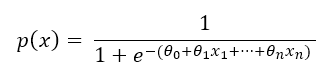

<img src="https://www.fromthegenesis.com/wp-content/uploads/2018/07/logreg_dp.jpg">

The sigmoid function can be converted into a logit function that behaves like a regular linear regression model with model coefficients, θ0 to θn:

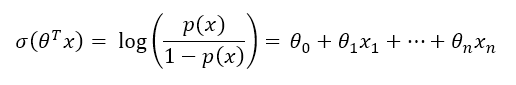

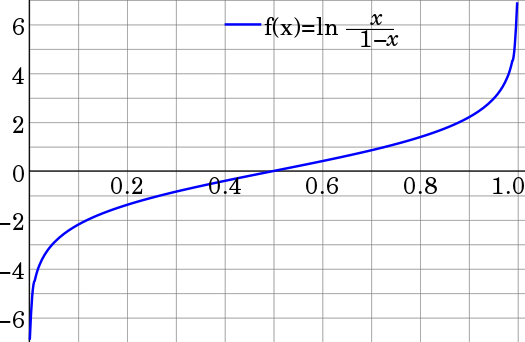

<b>The logit function above has probability values (x) range between 0 and 1, which can be mapped to infinite real numbers and it introduces non-linearity to model.</b>

<b>Note that log(p/1-p) is also known as log of odds.</b>

For binary classification, the logistic regression model performs class predictions as follows:

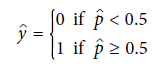

For model training, Logistic regression uses gradient descent algorithm by minimizing the following cost function (negative maximum likelihood) with learning rate, alpha (a):

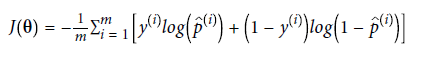

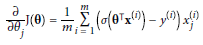

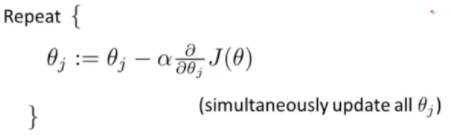

<b>Assumptions of Logistic Regression</b>:
1. Independent features are linearly related to log-odds
2. No strongly influential outliers
3. Observations are independent from each other.
4. Zero correlation between features (No multicollinearity) 

To support multiple classes in a classification problem, Logistic regression can be generalized without training multiple binary classifiers by using Softmax Regression instead.

<b>Requirement of feature scaling: Yes</b>

<b>Robust to outliers: No</b>

<b>Is multicollinearity an issue?: Yes</b>

<b>Advantages of Logistic Regression:</b>
1. No assumptions about distributions of classes
2. Easily extend to multiple classes
3. Performs well for linearly separable features
4. Model coefficients can be interpreted as indicators of feature importance

<b>Disadvantages of Logistic Regression:</b>
1. Model can overfit if the number of observations is lesser than the number of features (not often)
2. Performs poorly on non linearly separable datasets
3. Difficult to observe complex relationships of the model
4. Need large dataset and also sufficient training examples for all the categories to make correct predictions.

<b>Time complexity of model training: O(np)</b>

<b>Time complexity of model prediction: O(p)</b>

<b>Space complexity of model prediction: O(p)</b>

n - Number of training samples

p - Number of features

<b>Methods to handle imbalanced dataset</b>:
1. Assign class weights to model
2. Resampling techniques (Oversampling/SMOTETomek)

## Why using Logistic Regression over Linear Regression?

While binary classification tasks can also be solved using linear regression, linear regression model has several challenges related to binary classification tasks:

1. Model very sensitive to outliers (Changes equation of best fit line), such that class predictions may change.

2. Predicted probabilities may be out of range between 0 and 1.

To resolve both challenges, sigmoid function is used as mentioned above.

<img src = "https://editor.analyticsvidhya.com/uploads/711091.png" width="500">

## Interpretation of Logistic Regression Coefficients

For logistic regression models, coefficients in multiple logistic regression models represent the relationship between given feature and likelihood of belonging to specfic class, assuming that all other features remain constant (conditional dependence).

Interpretation:

A positive unit change in independent feature is associated with increase in likelihood of target variable belonging to given class and vice versa.

A higher unit magnitude in independent feature indicates a stronger predictor of likelihood of target variable belonging to given class and vice versa.

## Softmax Regression

Softmax regression uses the following softmax function for computing probabilities of record belonging to a given class:

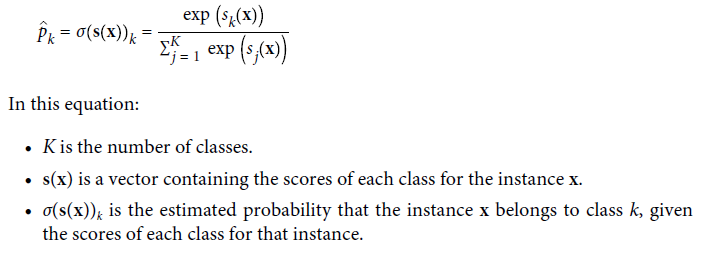

For multi-class classification, softmax regression model performs predictions as follows:

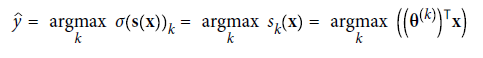

Unlike logistic regression, softmax regression predicts only one class at a time, such that <b>classes should be mutually exclusive</b>.

For model training, Softmax regression uses gradient descent algorithm by minimizing the following cost function:

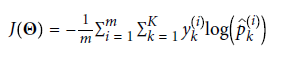

Note that the cost function above is the same as the cost function of logistic regression, when number of classes (K) equal to 2.

There are two types of strategies that can be used for multiclass classification:
1. <b>OVO (One vs One)</b> strategy: Splits a multi-class classification into one binary classification problem per class.
2. <b>OVR (One vs Rest)</b> strategy: Splits a multi-class classification into one binary classification problem per each pair of classes.

Softmax regression has the same set of assumptions as logistic regression.

In [1]:
# Import all required Python libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.datasets import load_wine
from dython.nominal import associations
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression
from skopt.space import Real, Integer, Categorical
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from transformers import OutlierCapTransformer, ScalingTransformer, GaussianTransformer

More details related to Exploratory Data Analysis for this classification problem statement can be found in the following Jupyter Notebook within the same folder: EDA_Classification.ipynb

In [2]:
data = load_wine()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])
y.name = 'wine_class'

In [3]:
X.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
dtype: int64

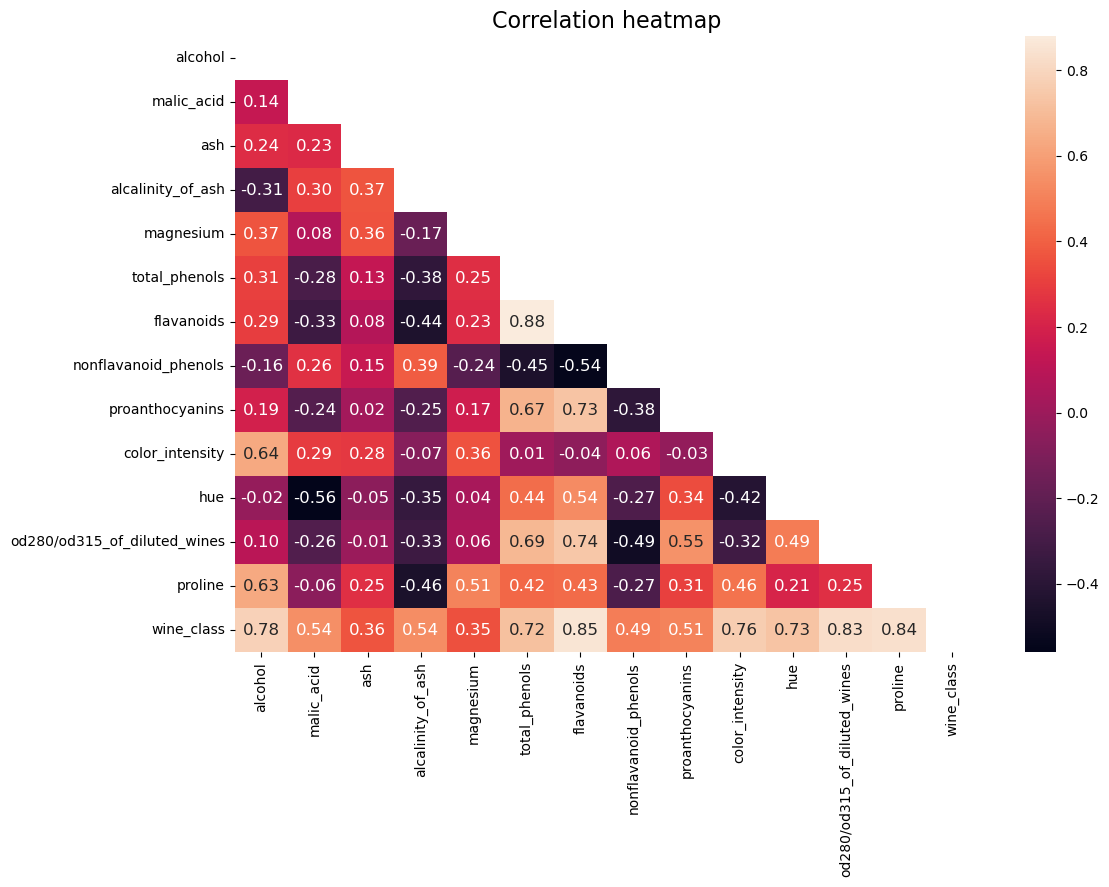

In [4]:
combined_data = pd.concat([X,y],axis=1)
r = associations(combined_data, num_num_assoc='spearman', compute_only=True, nominal_columns = ['wine_class'])
correlation = r['corr']
plt.figure(figsize=(12,8))
sns.heatmap(correlation.astype('float'), annot=True, mask = np.triu(np.ones_like(correlation.astype('float'), dtype=bool)),fmt='.2f',annot_kws={'fontsize':12})
plt.title('Correlation heatmap',size=16)
plt.show()

From the correlation heatmap above, there is a very strong correlation between flavenoids and total_phenols according to spearman correlation method. Either flavenoids and total_phenols variable can be removed from the dataset to avoid multicollinearity problem.

Note that correlation heatmaps only identify bivariate relationships. A better alternative to detect multicollinearity is using Variance Inflation Factor (VIF)

In [5]:
max_vif = np.inf
while max_vif > 5:
    vif = [variance_inflation_factor(X.select_dtypes('float').values, i) for i in range(X.select_dtypes('float').shape[1])]
    max_vif = np.max(vif)
    if max_vif > 5:
        column = pd.DataFrame({'vif': vif}, index=X.select_dtypes('float').columns).idxmax().values[0]
        X.drop([column],axis=1,inplace=True)
        print(column, 'column is removed with vif value of',max_vif)

alcohol column is removed with vif value of 206.1890565710355
ash column is removed with vif value of 163.29344216345316
total_phenols column is removed with vif value of 61.74814049718233
magnesium column is removed with vif value of 51.526969419366225
od280/od315_of_diluted_wines column is removed with vif value of 43.34567295520322
alcalinity_of_ash column is removed with vif value of 32.559609249388096
hue column is removed with vif value of 21.711004203855417
proanthocyanins column is removed with vif value of 14.515914948323369
proline column is removed with vif value of 11.141329391065753
nonflavanoid_phenols column is removed with vif value of 6.758138905693185


In [6]:
def nested_cv(X, y, pipeline, search_space = None):
    num_folds = 10
    skfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=120)
    val_f1, test_f1 = [], []
    for fold, (outer_train_idx, outer_test_idx) in enumerate(skfold.split(X, y)):
        X_train = X.iloc[outer_train_idx,:].reset_index(drop=True)
        y_train = y.iloc[outer_train_idx].reset_index(drop=True)
        X_test = X.iloc[outer_test_idx,:].reset_index(drop=True)
        y_test = y.iloc[outer_test_idx].reset_index(drop=True)
        search = BayesSearchCV(estimator=pipeline, search_spaces=search_space, cv=5, n_iter=10,scoring= make_scorer(f1_score, average='macro'),refit=True, n_jobs=3)
        search.fit(X_train,y_train)
        val_f1.append(search.best_score_)
        print(f'Validation F1 score for fold {fold+1}:',search.best_score_)
        print(f'Best hyperparameters for fold {fold+1}:', search.best_params_)
        y_pred = search.best_estimator_.predict(X_test)
        test_f1.append(f1_score(y_test,y_pred, average='macro'))
        print(f'Test F1 score for fold {fold+1}:',f1_score(y_test,y_pred, average='macro'))
        print()
        cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        cmd.ax_.set_title(f"Confusion Matrix - LogisticRegression (Fold {fold+1})")
        plt.grid(False)
        plt.show()
        print()
    print('----------------------')
    print('Average validation F1 score:', np.mean(val_f1))
    print('Average test F1 score:', np.mean(test_f1))

Validation F1 score for fold 1: 0.8840652153391433
Best hyperparameters for fold 1: OrderedDict([('classification__C', 0.3631473299397795), ('classification__penalty', 'l1')])
Test F1 score for fold 1: 1.0



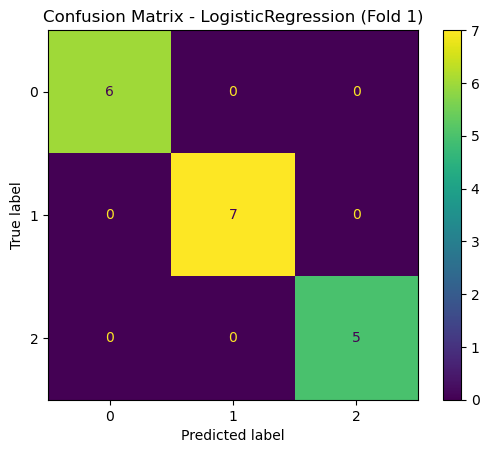


Validation F1 score for fold 2: 0.9030606474491389
Best hyperparameters for fold 2: OrderedDict([('classification__C', 0.5175380175929898), ('classification__penalty', 'l1')])
Test F1 score for fold 2: 0.8968253968253967



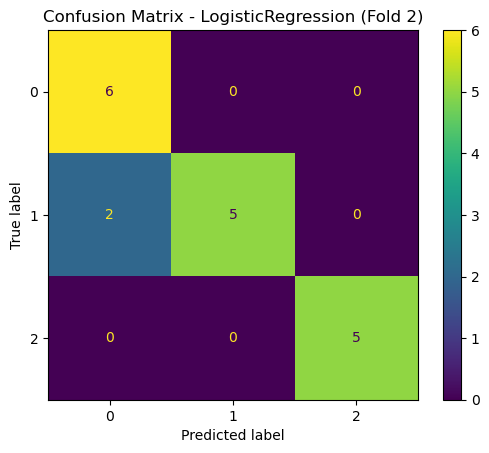


Validation F1 score for fold 3: 0.885884809516523
Best hyperparameters for fold 3: OrderedDict([('classification__C', 0.4872982889178248), ('classification__penalty', 'l1')])
Test F1 score for fold 3: 1.0



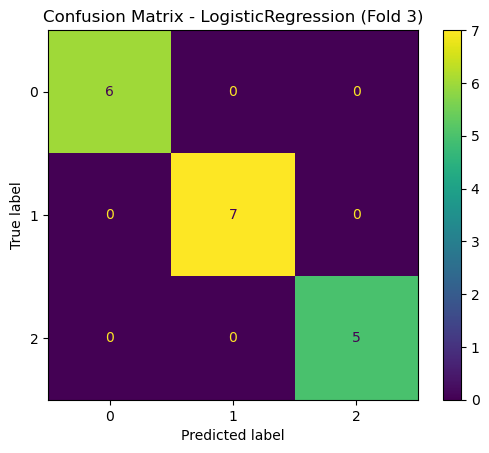


Validation F1 score for fold 4: 0.8915272066558018
Best hyperparameters for fold 4: OrderedDict([('classification__C', 0.43206319337957183), ('classification__penalty', 'l1')])
Test F1 score for fold 4: 0.9487179487179486



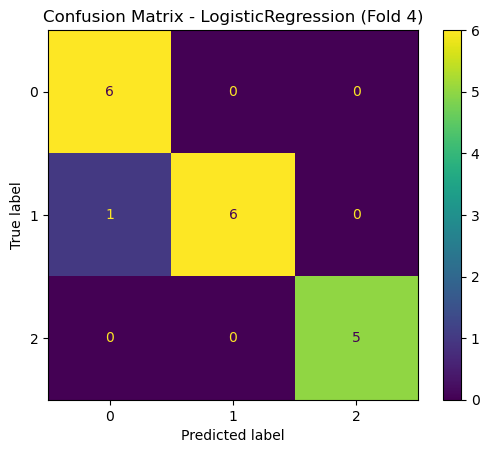


Validation F1 score for fold 5: 0.8913011217538969
Best hyperparameters for fold 5: OrderedDict([('classification__C', 0.28821999594209824), ('classification__penalty', 'l1')])
Test F1 score for fold 5: 0.9474747474747475



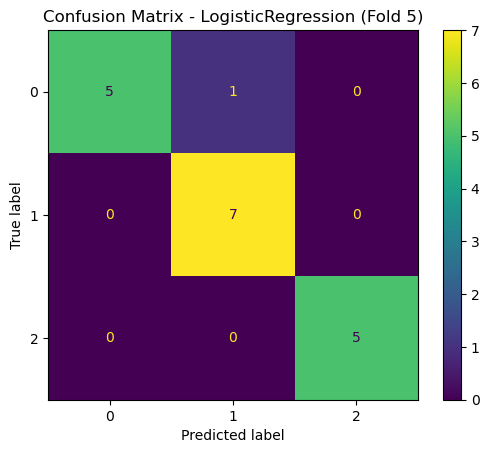


Validation F1 score for fold 6: 0.897499380934612
Best hyperparameters for fold 6: OrderedDict([('classification__C', 0.48009443144144676), ('classification__penalty', 'l1')])
Test F1 score for fold 6: 0.8916666666666667



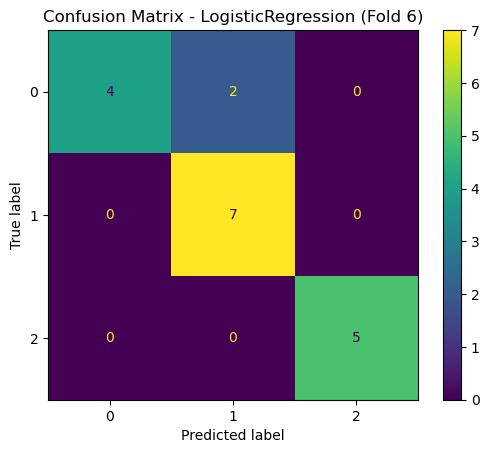


Validation F1 score for fold 7: 0.9022744385122019
Best hyperparameters for fold 7: OrderedDict([('classification__C', 0.4035697212268088), ('classification__penalty', 'l1')])
Test F1 score for fold 7: 0.8407407407407407



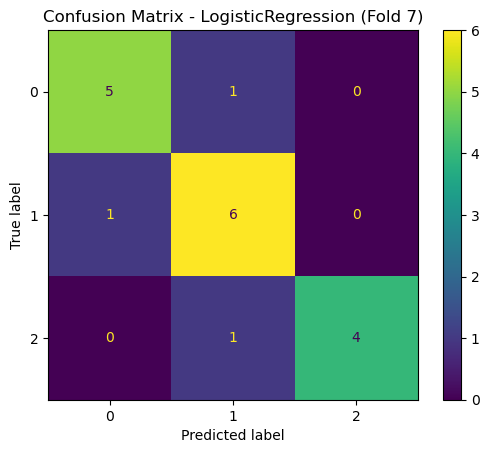


Validation F1 score for fold 8: 0.8609421569829895
Best hyperparameters for fold 8: OrderedDict([('classification__C', 0.09834585047878047), ('classification__penalty', 'l2')])
Test F1 score for fold 8: 0.8808080808080808



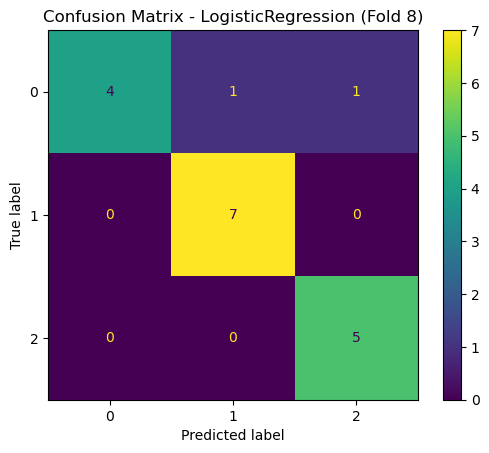


Validation F1 score for fold 9: 0.9101268997699018
Best hyperparameters for fold 9: OrderedDict([('classification__C', 0.08234480913748476), ('classification__penalty', 'l1')])
Test F1 score for fold 9: 0.7185185185185184



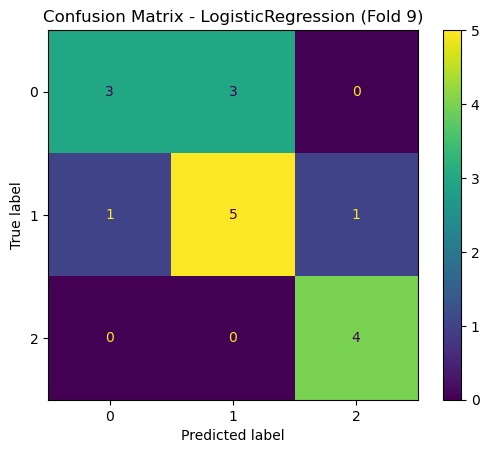


Validation F1 score for fold 10: 0.9111560882934144
Best hyperparameters for fold 10: OrderedDict([('classification__C', 0.14952666074911908), ('classification__penalty', 'l1')])
Test F1 score for fold 10: 0.8296296296296296



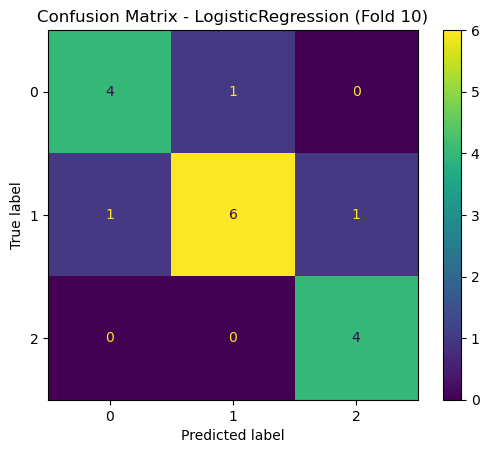


----------------------
Average validation F1 score: 0.8937837965207625
Average test F1 score: 0.8954381729381728


In [7]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear', dual=False, n_jobs=3)
pipeline = Pipeline(steps=[])
pipeline.steps.append(['outlier_capping',OutlierCapTransformer(X.columns.tolist())])
pipeline.steps.append(['gaussian',GaussianTransformer(X.columns.tolist())])
pipeline.steps.append(('scaling',ScalingTransformer('Robust')))
pipeline.steps.append(('classification',clf))
search_space = dict()
search_space['classification__C'] = Real(0.0001,1,'log-uniform')
search_space['classification__penalty'] = Categorical(['l1','l2'])
nested_cv(X, y, pipeline, search_space)

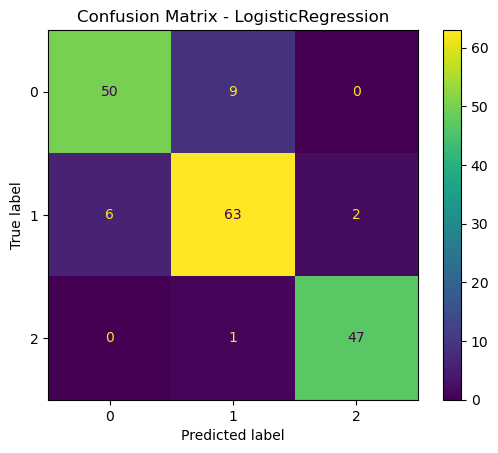

In [8]:
search = BayesSearchCV(estimator=pipeline, search_spaces=search_space, cv=5, n_iter=10, scoring= make_scorer(f1_score, average='macro'),refit=True, n_jobs=3)
search.fit(X,y)
y_pred = search.best_estimator_.predict(X)
cmd = ConfusionMatrixDisplay.from_predictions(y, y_pred)
cmd.ax_.set_title("Confusion Matrix - LogisticRegression")
plt.grid(False)
plt.show()

# Logistic Regression Assumption Checks

### Linearity of all features with log-odds

Relationship between log-odds and respective independent features should be linear. This can be verified using regression plots in seaborn.

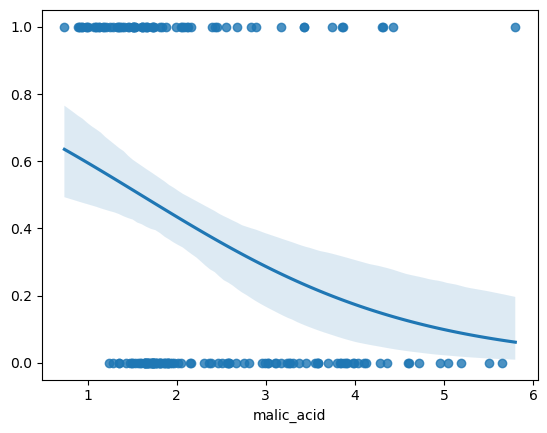

In [9]:
y_1 = np.where(y == 1, 1, 0)
sns.regplot(x= X['malic_acid'], y= y_1, logistic= True)
plt.show()

From the chart above, it clearly shows that the relationship between malic_acid feature and log odds of wine class 1 is non-linear. Thus, the assumption that all features have linear relationship with log-odds is violated.

### No strongly influential outliers

Logistic regression assumes that there are no highly influential outlier data points, as they distort the outcome and accuracy of the model.

Note that not all outliers are influential observations. Thus, strongly influential outliers can be identified using cook's distance.

In [10]:
pipeline = Pipeline(steps=[])
pipeline.steps.append(['outlier_capping',OutlierCapTransformer(X.columns.tolist())])
pipeline.steps.append(['gaussian',GaussianTransformer(X.columns.tolist())])
pipeline.steps.append(('scaling',ScalingTransformer('Robust')))
X_transformed = pipeline.fit_transform(X, y)

In [11]:
# Fitting GLM on training set
logit_results = sm.GLM(np.array(y), np.array(X_transformed), family=sm.families.Binomial()).fit()

# Get influence measures
influence = logit_results.get_influence(observed=False)

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X_transformed)

# Append absolute standardized residual values 
diagnosis_df['std_resid'] = st.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & (diagnosis_df['std_resid'] > 3)]

# Show all highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False)

,cooks_d,std_resid


From the output above, there are no highly influential outliers. Thus, the assumption of having no strongly influential outliers for logistic regression is valid.

### Independence between observations

Observations in logistic regression model should be independent from each other. This can be checked by plotting residual series plot after fitting GLM (Generalized linear model).

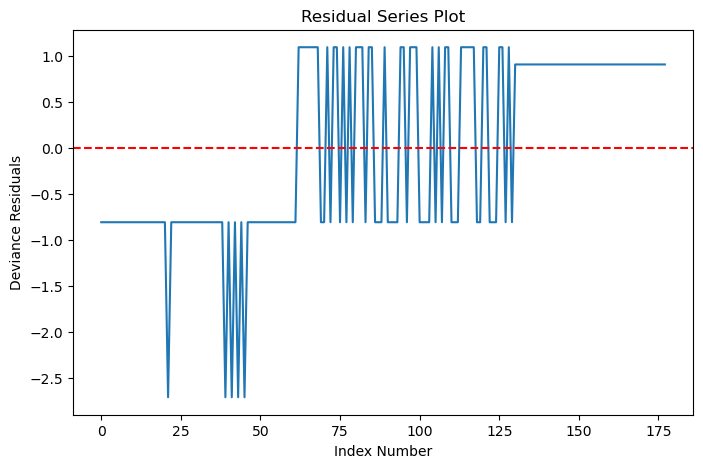

In [12]:
# Setup plot 
plt.figure(figsize=(8,5))
# Generate residual series plot using standardized deviance residuals
plt.plot(X_transformed.index.tolist(), st.zscore(logit_results.resid_deviance))
plt.title('Residual Series Plot')
plt.xlabel('Index Number')
plt.ylabel('Deviance Residuals')
# Draw horizontal line at y=0
plt.axhline(y = 0, ls="--", color='red')
plt.show()

From the plot above, there seems to be some pattern based on the ordering of the data. Thus, the assumption of independence between observations may be violated. Further investigation is required.

### No multicollinearity

Using variance inflation factor (VIF), there should be no very strong correlation between features (No multicollinearity - Threshold of less than 5).

In [13]:
vif = [variance_inflation_factor(X.select_dtypes('float').values, i) for i in range(X.select_dtypes('float').shape[1])]
pd.DataFrame({'vif': vif}, index=X.select_dtypes('float').columns)

,vif
malic_acid,4.105501
flavanoids,2.682781
color_intensity,4.957792


From the output above, all VIF values are less than 5. This indicates that there is no multicollinearity between independent features.